In [1]:
import pandas as pd
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [2]:
df = pd.read_csv("C:\\Users\\Admin\\Desktop\\Udacity Time Series Analysis in Python\\Time Series contd\\BeerWineLiquor.csv")

In [3]:
df.head()

,DATE,MRTSSM4453USN
0,1992-01-01,1509
1,1992-02-01,1541
2,1992-03-01,1597
3,1992-04-01,1675
4,1992-05-01,1822


##### Facebook's prophet library requires data in very specific format! the columns of the dataset should be called 'ds'(independent) and 'y'(dependent )

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 2 columns):
DATE             336 non-null object
MRTSSM4453USN    336 non-null int64
dtypes: int64(1), object(1)
memory usage: 5.4+ KB


In [5]:
df.columns = ['ds','y'] # This is required by facebook's prophet!

In [6]:
df.head()

,ds,y
0,1992-01-01,1509
1,1992-02-01,1541
2,1992-03-01,1597
3,1992-04-01,1675
4,1992-05-01,1822


In [7]:
df['ds'] = pd.to_datetime(df['ds'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 2 columns):
ds    336 non-null datetime64[ns]
y     336 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.4 KB


In [9]:
len(df)

336

In [10]:
train = df.iloc[:324]
test = df.iloc[324:]

In [11]:
m = Prophet()
m.fit(train)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [12]:
# Placeholder to hold future predictions:

future = m.make_future_dataframe(periods=12, freq='MS')

In [13]:
future

,ds
0,1992-01-01
1,1992-02-01
2,1992-03-01
3,1992-04-01
4,1992-05-01
...,...
331,2019-08-01
332,2019-09-01
333,2019-10-01
334,2019-11-01


In [14]:
len(train), len(future)

(324, 336)

In [15]:
forecast = m.predict(future)

In [16]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [17]:
forecast[['ds','yhat_lower', 'yhat_upper','yhat']].tail(12)

,ds,yhat_lower,yhat_upper,yhat
324,2019-01-01,4321.226567,4642.139706,4477.613780
325,2019-02-01,4328.948131,4669.331838,4502.608874
326,2019-03-01,4581.525986,4909.813442,4745.927678
327,2019-04-01,4603.493815,4931.138635,4769.052274
328,2019-05-01,4876.804997,5199.584750,5041.150368
329,2019-06-01,4860.648489,5191.794209,5030.891080
330,2019-07-01,5006.260500,5339.196599,5177.163855
331,2019-08-01,4923.447591,5245.626793,5086.040833
332,2019-09-01,4781.580000,5115.362524,4946.292277
333,2019-10-01,4876.451525,5202.487238,5029.139255


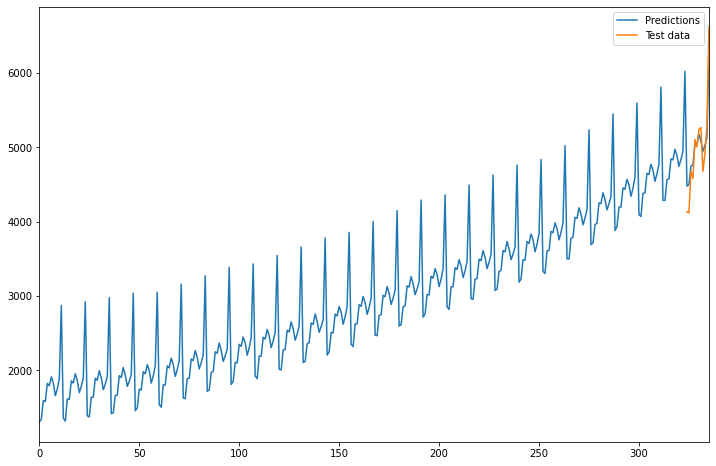

In [24]:
ax = forecast.plot(y='yhat', label='Predictions', legend=True, figsize=(12,8))
test.plot(y='y', label='Test data', legend=True, ax=ax)

In [32]:
pred = forecast.iloc[-12:]['yhat']

In [33]:
pred

324    4477.613780
325    4502.608874
326    4745.927678
327    4769.052274
328    5041.150368
329    5030.891080
330    5177.163855
331    5086.040833
332    4946.292277
333    5029.139255
334    5127.358348
335    6237.250692
Name: yhat, dtype: float64

In [34]:
test['y']

324    4135
325    4117
326    4674
327    4582
328    5107
329    5006
330    5241
331    5268
332    4677
333    4913
334    5298
335    6624
Name: y, dtype: int64

In [35]:
from statsmodels.tools.eval_measures import rmse

In [36]:
rmse = rmse(pred,test['y'])

In [37]:
rmse

226.03110769312613

In [38]:
test.mean()

y    4970.166667
dtype: float64

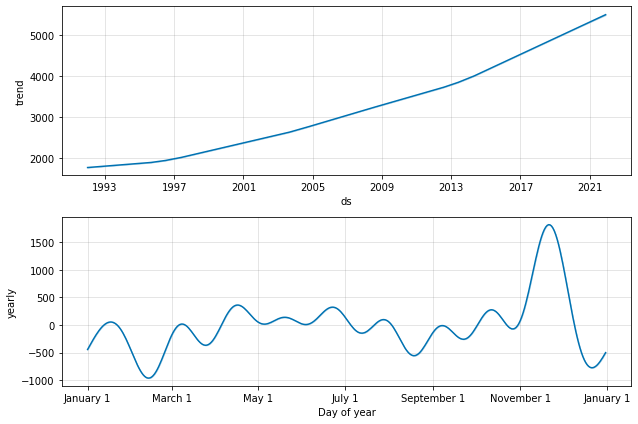

In [51]:
m.plot_components(forecast);

##### More diagnostics of Prophet using cross validation on several sections of the dataset.

In [39]:
from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [43]:
# initial training period
initial = 5*365
initial = str(initial) + ' days'

# period length we will be performing cross validation for!
period = 5 * 365
period = str(period) + ' days'

# horizon of prediction for each fold!
horizon = 365
horizon = str(horizon) + ' days'

In [44]:
initial, period, horizon

('1825 days', '1825 days', '365 days')

In [45]:
df_cv = cross_validation(m, initial=initial, period=period, horizon=horizon)

INFO:fbprophet:Making 5 forecasts with cutoffs between 1997-12-06 00:00:00 and 2017-12-01 00:00:00


In [46]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1998-01-01,1812.534919,1764.489261,1863.557716,1846,1997-12-06
1,1998-02-01,1759.795736,1706.479291,1812.389812,1768,1997-12-06
2,1998-03-01,1946.273212,1897.070624,1995.755143,1894,1997-12-06
3,1998-04-01,1958.983869,1907.604212,2009.399398,1963,1997-12-06
4,1998-05-01,2085.448964,2034.092319,2135.004318,2140,1997-12-06


In [47]:
len(df_cv)

60

In [48]:
performance_metrics(df_cv)

,horizon,mse,rmse,mae,mape,mdape,coverage
0,57 days,38394.662777,195.945561,164.297639,0.057399,0.073177,0.333333
1,58 days,46689.735085,216.078076,196.318273,0.072754,0.078679,0.166667
2,59 days,44360.061291,210.618283,188.364709,0.066653,0.073177,0.166667
3,61 days,36094.676002,189.985989,166.401705,0.057139,0.056493,0.333333
4,62 days,38728.147178,196.794683,171.497341,0.055720,0.056116,0.333333
5,85 days,26429.691445,162.572112,134.104824,0.048770,0.040791,0.333333
6,86 days,30631.147692,175.017564,159.234851,0.059655,0.056116,0.166667
7,88 days,26763.473034,163.595455,149.367702,0.050556,0.049678,0.166667
8,89 days,24382.219654,156.148070,133.474621,0.044527,0.046779,0.333333
9,90 days,25407.001311,159.395738,137.305054,0.043392,0.043375,0.333333


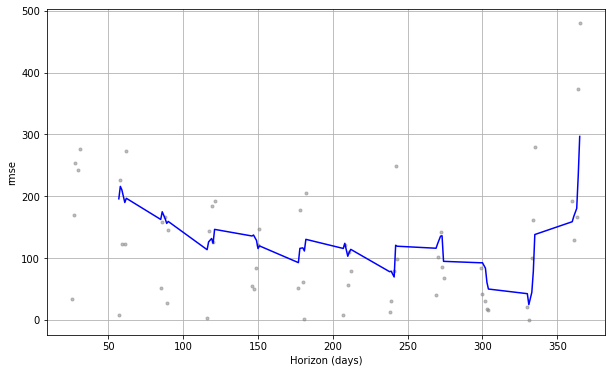

In [50]:
plot_cross_validation_metric(df_cv, metric='rmse');